In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from glob import glob
import pickle
import pandas as pd

In [3]:
dataset_path = "/mnt/ssd2/custom_dataset/kitti_pointpillars_activations_aggregated_raw"
feature_paths= sorted(glob(os.path.join(dataset_path, "features", "*")))


In [7]:
max_vals = [-np.inf, -np.inf, -np.inf]
min_vals = [np.inf, np.inf, np.inf]
import tqdm.auto as tqdm
with tqdm.tqdm(total=len(feature_paths)) as pbar:
    for path in feature_paths:
        activations = pickle.load(open(path, "rb"))
        inp = activations[0]
        mid = activations[1]
        out = activations[2]
        max_inp = np.max(inp)
        min_inp = np.min(inp)
        max_mid = np.max(mid)
        min_mid = np.min(mid)
        max_out = np.max(out)
        min_out = np.min(out)
        if max_inp > max_vals[0]:
            max_vals[0] = max_inp
        if min_inp < min_vals[0]:
            min_vals[0] = min_inp
        if max_mid > max_vals[1]:
            max_vals[1] = max_mid
        if min_mid < min_vals[1]:
            min_vals[1] = min_mid
        if max_out > max_vals[2]:
            max_vals[2] = max_out
        if min_out < min_vals[2]:
            min_vals[2] = min_out
        pbar.update(1)

print(max_vals)
print(min_vals)

  0%|          | 0/7481 [00:00<?, ?it/s]

[8.231327, 13.890282, 12.468322]
[0.0, 0.0, 0.0]


In [8]:
import tqdm.auto as tqdm
inp_all_hist = np.zeros(100)
mid_all_hist = np.zeros(100)
out_all_hist = np.zeros(100)
bin_edges = np.linspace(0, 1, 101)

with tqdm.tqdm(total=len(feature_paths)) as pbar:
    for path in feature_paths:
        activations = pickle.load(open(path, "rb"))
        inp = activations[0]
        mid = activations[1]
        out = activations[2]
        norm_inp = (inp - min_vals[0]) / (max_vals[0] - min_vals[0])
        histogram_inp, bins_inp = np.histogram(norm_inp, bins=bin_edges, range=(0, 1))
        norm_mid = (mid - min_vals[1]) / (max_vals[1] - min_vals[1])
        histogram_mid, bins_mid = np.histogram(norm_mid, bins=bin_edges, range=(0, 1))
        norm_out = (out - min_vals[2]) / (max_vals[2] - min_vals[2])
        histogram_out, bins_out = np.histogram(norm_out, bins=bin_edges, range=(0, 1))
        inp_all_hist += histogram_inp
        mid_all_hist += histogram_mid
        out_all_hist += histogram_out
        pbar.update(1)
        

  0%|          | 0/7481 [00:00<?, ?it/s]

In [ ]:
np.save("inp_all_hist.npy", inp_all_hist)
np.save("mid_all_hist.npy", mid_all_hist)
np.save("out_all_hist.npy", out_all_hist)

In [3]:
inp = np.load("inp_all_hist.npy")
mid = np.load("mid_all_hist.npy")
out = np.load("out_all_hist.npy")

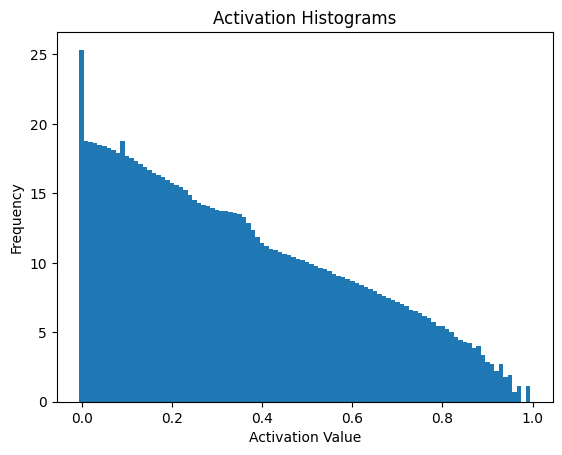

In [11]:
bin_edges = np.linspace(0, 1, 101)
#Plot histograms as bar charts
plt.figure()
plt.bar(bin_edges[:-1], np.log(inp), width=0.01, label="Input")
# plt.bar(bin_edges[:-1], mid, width=0.01, bottom = inp, label="Middle")
# plt.bar(bin_edges[:-1], out, width=0.01, bottom=inp+mid, label="Output")
# plt.plot(bin_edges[:-1], inp, label="Input")
# plt.plot(bin_edges[:-1], mid, label="Middle")
# plt.plot(bin_edges[:-1], out, label="Output")
# plt.legend()
plt.title("Activation Histograms")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.show()

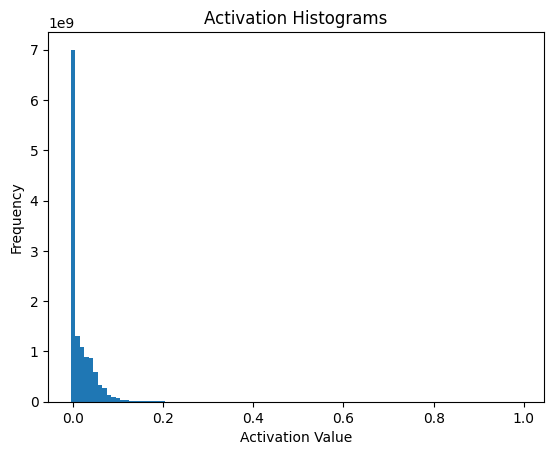

In [12]:
bin_edges = np.linspace(0, 1, 101)
#Plot histograms as bar charts
plt.figure()
# plt.bar(bin_edges[:-1], np.log(inp), width=0.01, label="Input")
plt.bar(bin_edges[:-1], mid, width=0.01, label="Middle")
# plt.bar(bin_edges[:-1], out, width=0.01, bottom=inp+mid, label="Output")
# plt.plot(bin_edges[:-1], inp, label="Input")
# plt.plot(bin_edges[:-1], mid, label="Middle")
# plt.plot(bin_edges[:-1], out, label="Output")
# plt.legend()
plt.title("Activation Histograms")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.show()

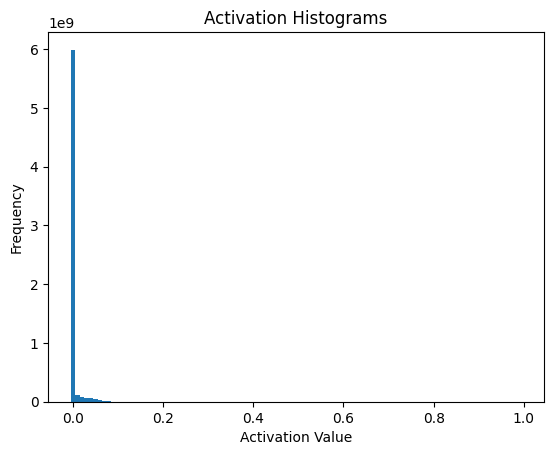

In [13]:
bin_edges = np.linspace(0, 1, 101)
#Plot histograms as bar charts
plt.figure()
# plt.bar(bin_edges[:-1], np.log(inp), width=0.01, label="Input")
# plt.bar(bin_edges[:-1], mid, width=0.01, label="Middle")
plt.bar(bin_edges[:-1], out, width=0.01, label="Output")
# plt.plot(bin_edges[:-1], inp, label="Input")
# plt.plot(bin_edges[:-1], mid, label="Middle")
# plt.plot(bin_edges[:-1], out, label="Output")
# plt.legend()
plt.title("Activation Histograms")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.show()